# Training text data analysis

In [24]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [7]:
TRAIN_DATA_PATH = '../../data/text_data/train.txt'

In [162]:
import ast

def load_data_lists(path):
    data_points_lists = []
    with open(path, encoding='utf-8') as f:
        lines = f.readlines()

        for line in lines:
            try:
                data_points_lists.append(ast.literal_eval(line))
            except:
                # Ignore lines with errors
                pass

    print('Found {} lines in "{}".'.format(len(lines), TRAIN_DATA_PATH))
    print('Successfully loaded {} data points from "{}".'.format(len(data_points_lists), path))
    
    return data_points_lists

In [163]:
data_points_lists = load_data_lists(TRAIN_DATA_PATH)

Found 29040 lines in "../../data/text_data/train.txt".
Successfully loaded 29040 data points from "../../data/text_data/train.txt".


In [165]:
import pandas as pd

COLUMN_NAMES = ['ID', 'Text', 'Sarcastic']

def construct_df(data_points_lists, column_names=COLUMN_NAMES):
    df = pd.DataFrame(data_points_lists, columns=column_names)
    df['ID'] = pd.to_numeric(df['ID'])
    df['Sarcastic'] = df['Sarcastic'].astype('bool')
    
    return df

In [166]:
train_df = construct_df(data_points_lists)

train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29040 entries, 0 to 29039
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         29040 non-null  int64 
 1   Text       29040 non-null  object
 2   Sarcastic  29040 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 482.2+ KB


,ID,Text,Sarcastic
0,910308516510011393,most # funny quotes : 21 snarky and # funny qu...,True
1,725333760762363905,spurs # creativethinking ! <url>,True
2,840006160660983809,<user> thanks for showing up for our appointme...,True
3,854334602516733952,only a hardcore fan of sir jonny sins will get...,True
4,908913372199915520,haha . # lol,True


## ID

In [27]:
print('Number of unique IDs - {} - out of total {}.'.format(train_df['ID'].nunique(), len(train_df)))

Number of unique IDs - 29040 - out of total 29040.


## Sarcasm distribution

In [29]:
import seaborn as sns

train_df.groupby('Sarcastic').size()

Sarcastic
False    14784
True     14256
dtype: int64

## Text

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def lengths_plot(data, target, title):
    lengths = data[target].str.len()

    ax = sns.displot(lengths)
    plt.title(title)
    ax.set(xlabel='Length')

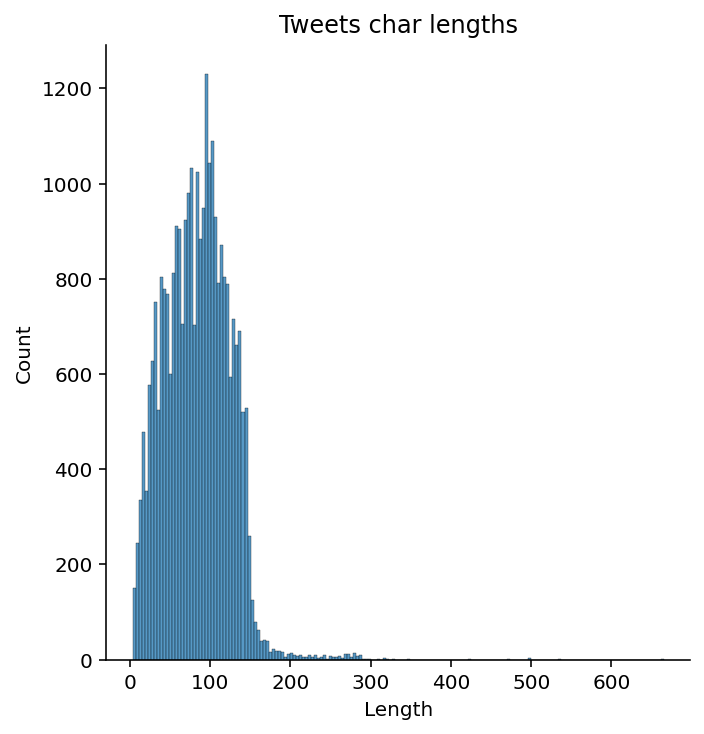

In [58]:
lengths_plot(train_df, 'Text', 'Tweets char lengths')

In [60]:
print('Tweets char lengths:')
train_df['Text'].str.len().describe()

Tweets char lengths:


count    29040.000000
mean        84.193629
std         40.424313
min          4.000000
25%         54.000000
50%         85.000000
75%        112.000000
max        665.000000
Name: Text, dtype: float64

In [182]:
print('Correlation of char lenghts with the target label ("Sarcastic"): {}'
      .format(train_df['Text'].str.len().corr(train_df['Sarcastic'])))

Correlation of char lenghts with the target label ("Sarcastic"): 0.12704800798608906


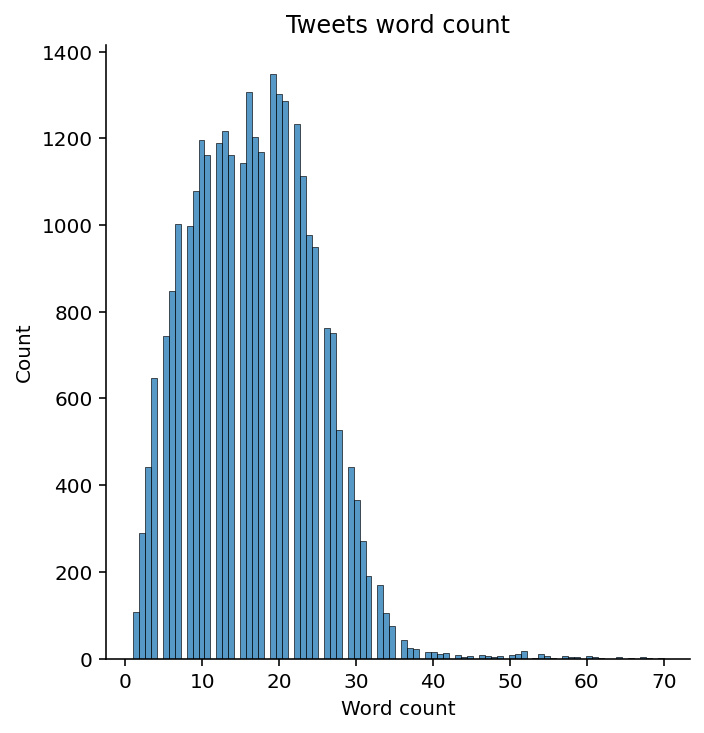

In [186]:
words = train_df['Text'].str.split('\\s+')
word_cnts = words.apply(len)

ax = sns.displot(word_cnts)
plt.title('Tweets word count')
ax.set(xlabel='Word count')

In [68]:
print('Tweets word counts:')
word_cnts.describe()

Tweets word counts:


count    29040.000000
mean        16.687844
std          8.059311
min          1.000000
25%         10.000000
50%         16.000000
75%         22.000000
max         70.000000
Name: Text, dtype: float64

In [185]:
print('Correlation of word counts with the target label ("Sarcastic"): {}'
      .format(word_cnts.corr(train_df['Sarcastic'])))

Correlation of word counts with the target label ("Sarcastic"): 0.1530693723971331


### Special tags

In [84]:
import re

In [111]:
def extract_regex_matches(regex_pattern, data):
    extracted_data = data['Text'].apply(lambda txt: re.findall(regex_pattern, txt))
    return extracted_data

In [117]:
SPECIAL_TAG_REGEX_PATTERN = r'\<.*?\>'

special_tags = extract_regex_matches(SPECIAL_TAG_REGEX_PATTERN, train_df)
special_tags.head()

0           [<url>]
1           [<url>]
2          [<user>]
3    [<url>, <url>]
4                []
Name: Text, dtype: object

In [118]:
def flatten_and_unique(data, data_name='values'):
    flatten_data = data.apply(pd.Series).stack()
    unique_data = flatten_data.unique()

    print('Found {} unique {} out of total {}:'.format(len(unique_special_tags), data_name, len(flatten_data)))
    
    return flatten_data, unique_data

In [119]:
all_special_tags, unique_special_tags = flatten_and_unique(special_tags, 'special tags')
unique_special_tags

Found 15 unique special tags out of total 17984:


array(['<url>', '<user>', '<num>', '<- <url>', '<3 check out <url>',
       '<<url>', '< url >',
       '<input id="password" ..snip.. maxlength="6">', '<>', '<<# lwt<o>',
       '< marshmello looks so adorable, and lele looks so beautiful. both of you two mesmerizing me. <user>',
       '<= <num>', '<confidential assignment>', '<facepalm>', '<3 <url>'],
      dtype=object)

In [108]:
print('Most common special tags:')
all_special_tags.value_counts()

Most common special tags:


<user>                                                                                                 9246
<url>                                                                                                  8083
<num>                                                                                                   640
<>                                                                                                        3
< url >                                                                                                   2
<- <url>                                                                                                  1
<3 check out <url>                                                                                        1
<<url>                                                                                                    1
<input id="password" ..snip.. maxlength="6">                                                              1
<<# lwt<o>                  

In [148]:
print('Correlation of number of special tags with the target label ("Sarcastic"): {}'
      .format(special_tags.apply(len).corr(train_df['Sarcastic'])))

Correlation of number of special tags with the target label ("Sarcastic"): 0.016877533604066432


### Hashtags

In [121]:
HASHTAG_REGEX_PATTERN = r'# (\w+)'

hashtags = extract_regex_matches(HASHTAG_REGEX_PATTERN, train_df)
hashtags.head()

0    [funny, funny, funnyquotes, hilariousquotes, h...
1                                   [creativethinking]
2                                                   []
3                                                   []
4                                                [lol]
Name: Text, dtype: object

In [123]:
all_hashtags, unique_hashtags = flatten_and_unique(hashtags, 'hashtags')
unique_hashtags

Found 15 unique hashtags out of total 44066:


array(['funny', 'funnyquotes', 'hilariousquotes', ...,
       'olsenwpmoychallenge', 'gocamels', 'lgbtqiap'], dtype=object)

In [125]:
top_n = 20
print('{} most common hashtags:'.format(top_n))
all_hashtags.value_counts()[:top_n]

20 most common hashtags:


funny            1722
lol              1005
humor            1004
humour            681
memes             420
witticismsrus     407
meme              383
funnyquotes       380
jokes             366
joke              306
womensmarch       273
funnysayings      269
exgag             268
relatable         267
comedy            243
fun               242
funnygift         235
hilarious         232
goldenglobes      223
quotes            210
dtype: int64

In [145]:
print('Correlation of number of hashtags with the target label ("Sarcastic"): {}'
      .format(hashtags.apply(len).corr(train_df['Sarcastic'])))

Correlation of number of hashtags with the target label ("Sarcastic"): 0.42931976390627097


### Emojis

In [126]:
EMOJI_REGEX_PATTERN = r'(emoji_\w+)'

emojis = extract_regex_matches(EMOJI_REGEX_PATTERN, train_df)
emojis.head()

0    []
1    []
2    []
3    []
4    []
Name: Text, dtype: object

In [132]:
all_emojis, unique_emojis = flatten_and_unique(emojis, 'emojis')
unique_emojis

Found 15 unique emojis out of total 9973:


array(['emoji_689', 'emoji_156', 'emoji_3762', ..., 'emoji_6790',
       'emoji_1798', 'emoji_7810'], dtype=object)

In [133]:
top_n = 20
print('{} most common emojis:'.format(top_n))
all_emojis.value_counts()[:top_n]

20 most common emojis:


emoji_15      857
emoji_19      484
emoji_623     374
emoji_238     363
emoji_2       158
emoji_590     131
emoji_8       121
emoji_3526    120
emoji_32      112
emoji_53      110
emoji_156     106
emoji_1495    102
emoji_958      96
emoji_1486     89
emoji_70       78
emoji_744      78
emoji_202      77
emoji_92       71
emoji_1930     71
emoji_381      66
dtype: int64

In [147]:
print('Correlation of number of emojis with the target label ("Sarcastic"): {}'
      .format(emojis.apply(len).corr(train_df['Sarcastic'])))

Correlation of number of emojis with the target label ("Sarcastic"): -0.04870704633071883


### Words

In [197]:
words[train_df['Sarcastic']].apply(pd.unique).apply(pd.Series).stack().value_counts()[:30]

#         10866
.          4678
           4489
<url>      3900
the        3287
<user>     3114
,          3049
!          2871
i          2632
to         2456
a          2391
funny      2211
is         1937
…          1910
this       1843
of         1800
you        1761
for        1668
in         1478
and        1478
?          1455
...        1391
it         1353
my         1230
:          1166
's         1166
lol        1129
humor      1078
that       1021
on          985
dtype: int64

### Baseline ideas

In [160]:
from sklearn.metrics import accuracy_score

accuracy_score((hashtags.apply(len) > 0), train_df['Sarcastic'])

0.7176997245179063

In [174]:
valid_df = construct_df(load_data_lists('../../data/text_data/valid.txt'), COLUMN_NAMES + ['Sarcastic_1'])

valid_df.info()

(valid_df['Sarcastic'] != valid_df['Sarcastic_1']).sum() 

Found 2410 lines in "../../data/text_data/train.txt".
Successfully loaded 2410 data points from "../../data/text_data/valid.txt".
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2410 non-null   int64 
 1   Text         2410 non-null   object
 2   Sarcastic    2410 non-null   bool  
 3   Sarcastic_1  2410 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 59.0+ KB


87

In [175]:
valid_hashtags = extract_regex_matches(HASHTAG_REGEX_PATTERN, valid_df)

print(accuracy_score((valid_hashtags.apply(len) > 0), valid_df['Sarcastic']))
print(accuracy_score((valid_hashtags.apply(len) > 0), valid_df['Sarcastic_1']))

0.6481327800829876
0.6344398340248962


In [176]:
test_df = construct_df(load_data_lists('../../data/text_data/test.txt'), COLUMN_NAMES + ['Sarcastic_1'])

test_df.info()

(test_df['Sarcastic'] != test_df['Sarcastic_1']).sum() 

Found 2409 lines in "../../data/text_data/train.txt".
Successfully loaded 2409 data points from "../../data/text_data/test.txt".
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2409 non-null   int64 
 1   Text         2409 non-null   object
 2   Sarcastic    2409 non-null   bool  
 3   Sarcastic_1  2409 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 58.9+ KB


144

In [177]:
test_hashtags = extract_regex_matches(HASHTAG_REGEX_PATTERN, test_df)

print(accuracy_score((test_hashtags.apply(len) > 0), test_df['Sarcastic']))
print(accuracy_score((test_hashtags.apply(len) > 0), test_df['Sarcastic_1']))

0.6608551266085513
0.6359485263594853
